In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn


Dataset Shape: (4521, 17)
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Accuracy: 0.901657458563536

Confusion Matrix:
[[779  28]
 [ 61  37]]

Classificatio

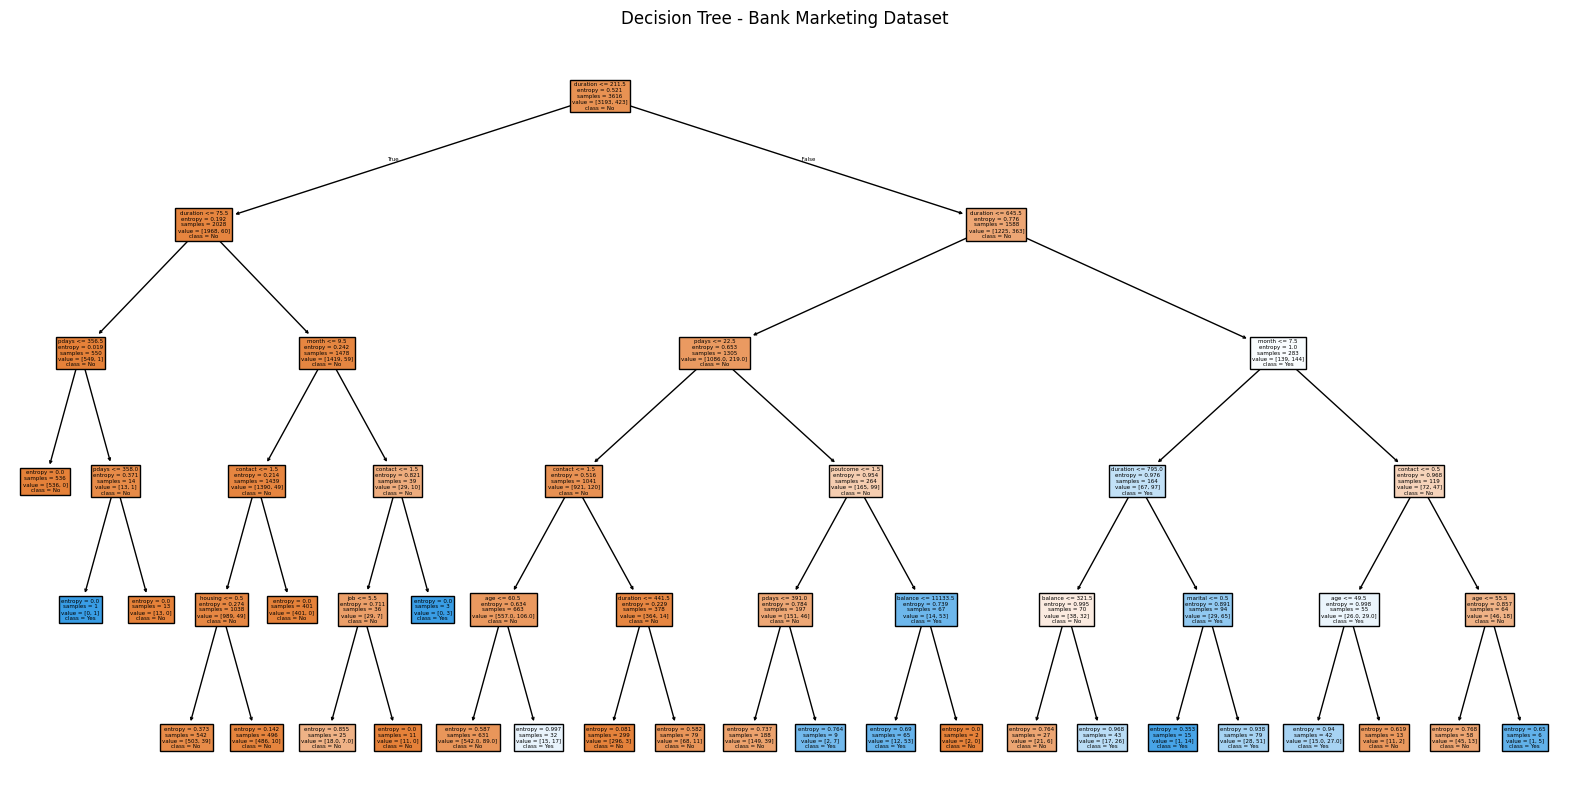

In [3]:
# Decision Tree Classifier - Bank Marketing Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 1. Load Dataset
# -----------------------------
# Change path if needed
data = pd.read_csv("/content/bank.csv", sep=';')

print("Dataset Shape:", data.shape)
print(data.head())

# -----------------------------
# 2. Encode Categorical Columns
# -----------------------------
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

# -----------------------------
# 3. Split Features & Target
# -----------------------------
X = data.drop('y', axis=1)   # Features
y = data['y']                # Target

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Train Decision Tree Model
# -----------------------------
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------------
# 6. Predictions
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 7. Evaluation
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# 8. Visualize Decision Tree
# -----------------------------
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.title("Decision Tree - Bank Marketing Dataset")
plt.show()
